# CS 4824 - Machine Learning
The following contains all of our baseline comparison metrics and our developed metrics for hierarchical agglomerative clustering.

In [250]:
# Necessary libraries for import
import pandas as pd
import numpy as np
import random
import operator
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

## Open the necessary files for computation

In [209]:
# Read the dataset
file_path = 'merged.csv'
data = pd.read_csv(file_path)

# # Filter the dataset for 'Disposable income per capita' and 'Life expectancy at birth'
# income_life_exp_data = data[data['Indicator'].isin(['Disposable income per capita', 'Life expectancy at birth'])]

# # Pivot the data to have one row per region with both indicators
# pivot_data = income_life_exp_data.pivot_table(index=['REG_ID', 'Regions', 'TIME', 'Time'], 
#                                               columns='Indicator', 
#                                               values='Value').reset_index()

# # Normalize the features
scaler = MinMaxScaler()
# features_to_cluster = pivot_data[['Disposable income per capita', 'Life expectancy at birth']]
# normalized_features = scaler.fit_transform(data)
# normalized_df = pd.DataFrame(normalized_features, columns=features_to_cluster.columns)

# Replace NaNs with the averages of the columns
data_clean = data.drop('State', axis=1)

for col in data_clean:
    if data[col].isnull().sum() > 0:
        avg = data_clean[col].mean()
        data_clean[col].fillna(value=avg, inplace=True)
        
indices = [i for i in data['State']]

# scaler.fit_transform(data)
normalized_df = (data_clean - data_clean.mean()) / data_clean.std()

## Centroid Link
The following creates a hierarchical agglomerative clustering of the above data based upon the centroid link metric.

In [148]:
def cluster_distance(c1, c2):
    return math.sqrt((c2[1]-c1[1])**2+(c2[0]-c1[0])**2)

def find_min_clusters(clusters):
    curr_cluster_1 = 0
    curr_cluster_2 = 1
    curr_dist = -1
    for i in range(0, len(clusters)):
        for y in range(i+1, len(clusters)):
            new_dist = cluster_distance(clusters[i], clusters[y])
            if curr_dist < 0 or curr_dist > cluster_distance(clusters[i], clusters[y]):
                curr_cluster_1 = i
                curr_cluster_2 = y
                curr_dist = cluster_distance(clusters[i], clusters[y])
    return curr_cluster_1, curr_cluster_2, curr_dist

In [149]:
def hierarchical_clustering_linkage(df):
    # linkage used for dendrogram drawing
    linkage = []
    
    # List of current elements, in their x and y dimensions, zipped together
    curr_x = [x for x in df.iloc[:,0]]
    curr_y = [y for y in df.iloc[:,1]]
    curr_clusters = [list(c) for c in zip(curr_x, curr_y)]
    
    # Indices of current clusters
    idxs = [i for i in normalized_df.index]
    
    # The number of items in each cluster
    items_per_cluster = [1 for i in range(0, len(curr_x))]

    while len(curr_clusters) > 1:
        # Get cluster indices and distances
        c1, c2, curr_dist = find_min_clusters(curr_clusters)
        
        # Specify new cluster centroids
        new_c = []
        new_c.append((curr_clusters[c1][0] + curr_clusters[c2][0])/2)
        new_c.append((curr_clusters[c1][1] + curr_clusters[c2][1])/2)
        
        # Remove old clusters from the set of current clusters
        curr_clusters.pop(c1)
        curr_clusters.pop(c2-1)
        
        # Increment for new cluster
        idxs.append(idxs[-1] + 1)
        
        # Add new cluster to list of clusters
        curr_clusters.append(new_c)
        
        # Update number of items per cluster, removing old ones and adding in new one
        num_items = items_per_cluster[c1] + items_per_cluster[c2]
        items_per_cluster.pop(c1)
        items_per_cluster.pop(c2-1)
        items_per_cluster.append(num_items)
        
        # Add new iteraion to linkage
        linkage.append([idxs[c1], idxs[c2], curr_dist, num_items])
        
        # Remove old cluster indices
        idxs.pop(c1)
        idxs.pop(c2-1)
    
    return linkage

In [150]:
# Determine linkage of centroid link model
centroid_link_linkage = hierarchical_clustering_linkage(normalized_df)
pd.DataFrame(centroid_link_linkage, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(len(centroid_link_linkage))])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,13,24,0.004124,2
cluster 2,2,42,0.005831,2
cluster 3,6,29,0.008248,2
cluster 4,0,49,0.008499,3
cluster 5,11,21,0.009221,2
cluster 6,28,31,0.011663,2
cluster 7,46,51,0.011663,3
cluster 8,44,47,0.012368,2
cluster 9,37,56,0.013832,3
cluster 10,33,36,0.014866,2


## Single Link
The following creates a hierarchical agglomerative clustering of the above data based upon the single link metric.

In [152]:
def find_min_clusters_single_link(clusters, elements_in_clusters):
    curr_cluster_1 = 0
    curr_cluster_2 = 1
    curr_dist = -1
    for i in range(0, len(clusters)):
        for y in range(i+1, len(clusters)):
            for x in range(0, len(elements_in_clusters[i])):
                for z in range(0, len(elements_in_clusters[y])):
                    new_dist = cluster_distance(elements_in_clusters[i][x], elements_in_clusters[y][z])
                    if curr_dist < 0 or curr_dist > new_dist:
                        curr_cluster_1 = i
                        curr_cluster_2 = y
                        curr_dist = new_dist
    return curr_cluster_1, curr_cluster_2, curr_dist

In [153]:
def hierarchical_clustering_linkage_single_link(df):
    # linkage used for dendrogram drawing
    linkage = []
    
    # List of current elements, in their x and y dimensions, zipped together
    curr_x = [x for x in df.iloc[:,0]]
    curr_y = [y for y in df.iloc[:,1]]
    curr_clusters = [list(c) for c in zip(curr_x, curr_y)]
    elements_in_clusters = [[list(c)] for c in zip(curr_x, curr_y)]
    
    # Indices of current clusters
    idxs = [i for i in normalized_df.index]
    
    # The number of items in each cluster
    items_per_cluster = [1 for i in range(0, len(curr_x))]

    while len(curr_clusters) > 1:
        # Get cluster indices and distances
        c1, c2, curr_dist = find_min_clusters_single_link(curr_clusters, elements_in_clusters)
        new_clst_elem = elements_in_clusters[c1] + elements_in_clusters[c2]
        elements_in_clusters.pop(c1)
        elements_in_clusters.pop(c2-1)
        elements_in_clusters.append(new_clst_elem)
        
        # Specify new cluster centroids
        new_c = []
        new_c.append((curr_clusters[c1][0] + curr_clusters[c2][0])/2)
        new_c.append((curr_clusters[c1][1] + curr_clusters[c2][1])/2)
        
        # Remove old clusters from the set of current clusters
        curr_clusters.pop(c1)
        curr_clusters.pop(c2-1)
        
        # Increment for new cluster
        idxs.append(idxs[-1] + 1)
        
        # Add new cluster to list of clusters
        curr_clusters.append(new_c)
        
        # Update number of items per cluster, removing old ones and adding in new one
        num_items = items_per_cluster[c1] + items_per_cluster[c2]
        items_per_cluster.pop(c1)
        items_per_cluster.pop(c2-1)
        items_per_cluster.append(num_items)
        
        # Add new iteraion to linkage
        linkage.append([idxs[c1], idxs[c2], curr_dist, num_items])
        
        # Remove old cluster indices
        idxs.pop(c1)
        idxs.pop(c2-1)
    
    return linkage

In [154]:
single_link_linkage = hierarchical_clustering_linkage_single_link(normalized_df)
pd.DataFrame(single_link_linkage, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(len(single_link_linkage))])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,13,24,0.004124,2
cluster 2,2,42,0.005831,2
cluster 3,0,49,0.008245,3
cluster 4,6,29,0.008248,2
cluster 5,46,52,0.009219,3
cluster 6,11,21,0.009221,2
cluster 7,28,31,0.011663,2
cluster 8,44,47,0.012368,2
cluster 9,37,56,0.012372,3
cluster 10,33,36,0.014866,2


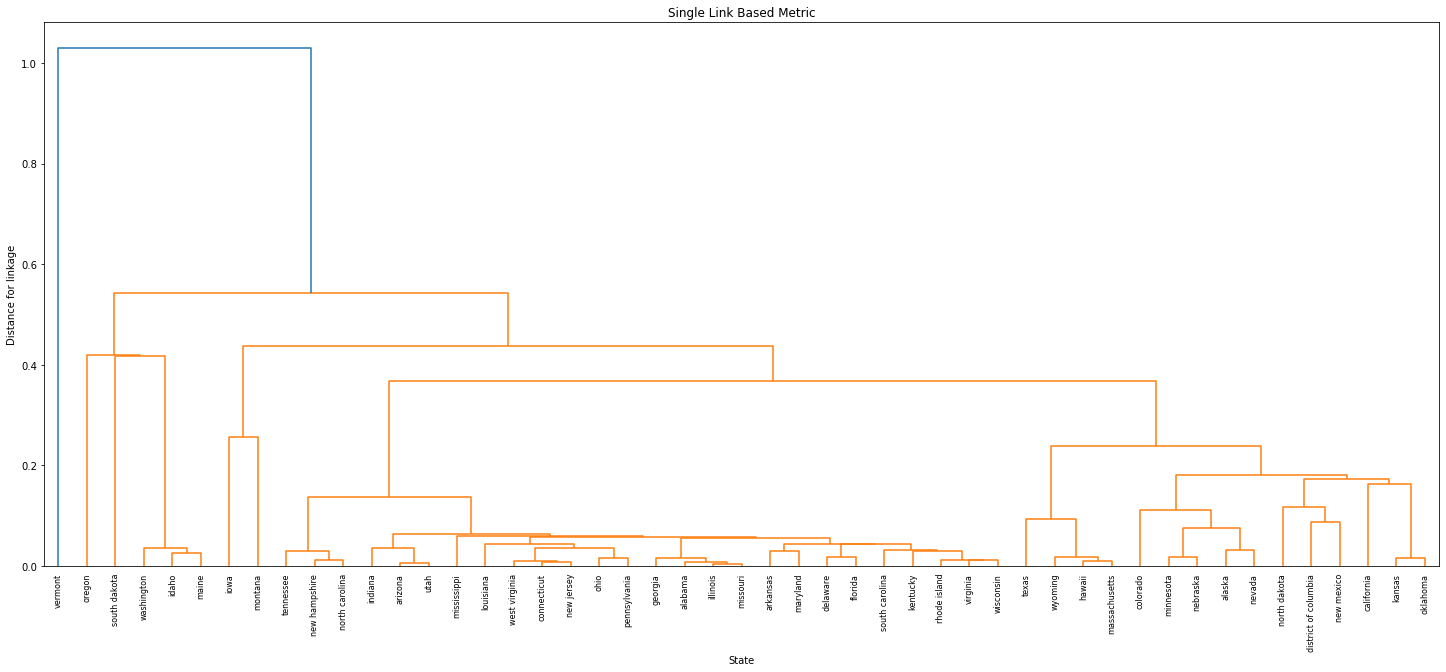

In [155]:
fig = plt.figure(figsize=(25, 10))
row_dendr = dendrogram(single_link_linkage, labels=indices)
plt.title("Single Link Based Metric")
plt.ylabel("Distance for linkage")
plt.xlabel("State")
plt.show()

## Complete Link
The following creates a hierarchical agglomerative clustering of the above data based upon the complete link metric.

In [156]:
def find_min_clusters_complete_link(clusters, elements_in_clusters):
    curr_cluster_1 = 0
    curr_cluster_2 = 1
    curr_dist = -1
    for i in range(0, len(clusters)):
        for y in range(i+1, len(clusters)):
            curr_group_dist = -1
            for x in range(0, len(elements_in_clusters[i])):
                for z in range(0, len(elements_in_clusters[y])):
                    new_dist = cluster_distance(elements_in_clusters[i][x], elements_in_clusters[y][z])
                    if curr_group_dist <= new_dist:
                        curr_group_dist = new_dist
            if curr_dist < 0 or (curr_dist > curr_group_dist and curr_group_dist > -1):
                        curr_cluster_1 = i
                        curr_cluster_2 = y
                        curr_dist = curr_group_dist
    return curr_cluster_1, curr_cluster_2, curr_dist

In [157]:
def hierarchical_clustering_linkage_complete_link(df):
    # linkage used for dendrogram drawing
    linkage = []
    
    # List of current elements, in their x and y dimensions, zipped together
    curr_x = [x for x in df.iloc[:,0]]
    curr_y = [y for y in df.iloc[:,1]]
    curr_clusters = [list(c) for c in zip(curr_x, curr_y)]
    elements_in_clusters = [[list(c)] for c in zip(curr_x, curr_y)]
    
    # Indices of current clusters
    idxs = [i for i in normalized_df.index]
    
    # The number of items in each cluster
    items_per_cluster = [1 for i in range(0, len(curr_x))]

    while len(curr_clusters) > 1:
        # Get cluster indices and distances
        c1, c2, curr_dist = find_min_clusters_complete_link(curr_clusters, elements_in_clusters)
        new_clst_elem = elements_in_clusters[c1] + elements_in_clusters[c2]
        elements_in_clusters.pop(c1)
        elements_in_clusters.pop(c2-1)
        elements_in_clusters.append(new_clst_elem)
        
        # Specify new cluster centroids
        new_c = []
        new_c.append((curr_clusters[c1][0] + curr_clusters[c2][0])/2)
        new_c.append((curr_clusters[c1][1] + curr_clusters[c2][1])/2)
        
        # Remove old clusters from the set of current clusters
        curr_clusters.pop(c1)
        curr_clusters.pop(c2-1)
        
        # Increment for new cluster
        idxs.append(idxs[-1] + 1)
        
        # Add new cluster to list of clusters
        curr_clusters.append(new_c)
        
        # Update number of items per cluster, removing old ones and adding in new one
        num_items = items_per_cluster[c1] + items_per_cluster[c2]
        items_per_cluster.pop(c1)
        items_per_cluster.pop(c2-1)
        items_per_cluster.append(num_items)
        
        # Add new iteraion to linkage
        linkage.append([idxs[c1], idxs[c2], curr_dist, num_items])
        
        # Remove old cluster indices
        idxs.pop(c1)
        idxs.pop(c2-1)
    
    return linkage

In [158]:
complete_link_linkage = hierarchical_clustering_linkage_complete_link(normalized_df)
pd.DataFrame(complete_link_linkage, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(len(complete_link_linkage))])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,13,24,0.004124,2
cluster 2,2,42,0.005831,2
cluster 3,6,29,0.008248,2
cluster 4,0,49,0.009219,3
cluster 5,11,21,0.009221,2
cluster 6,28,31,0.011663,2
cluster 7,44,47,0.012368,2
cluster 8,33,36,0.014866,2
cluster 9,16,34,0.014868,2
cluster 10,46,51,0.014868,3


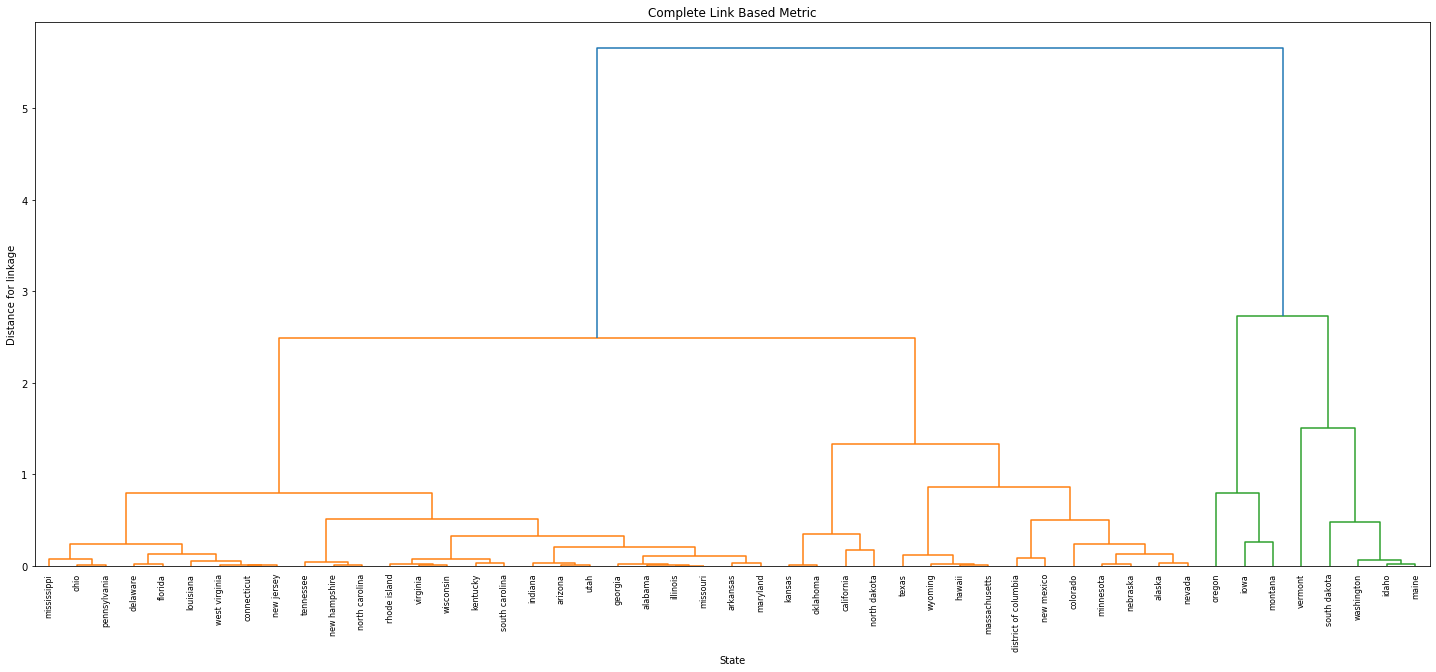

In [159]:
fig = plt.figure(figsize=(25, 10))
row_dendr = dendrogram(complete_link_linkage, labels=indices)
plt.title("Complete Link Based Metric")
plt.ylabel("Distance for linkage")
plt.xlabel("State")
plt.show()

## Fuzzy Membership Matrix
The following calculates a hierarchical agglomerative clustering of the above data using our fuzzy membership matrix metric.

In [210]:
def initialize_membership_matrix(n, k):
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for _ in range(k)]
        summation = sum(random_num_list)
        temp_list = [x / summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

# Update membership values based on the cluster centers
def update_membership_values(membership_mat, cluster_centers, df, m, k):
    p = float(2 / (m - 1))
    for i in range(len(df)):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(distances[j] / distances[c], p) for c in range(k) if distances[c] != 0])
            membership_mat[i][j] = float(1 / den) if den != 0 else 0
    return membership_mat

In [251]:
def hierarchical_clustering_linkage_fuzzy_membership_matrix(normalized_df):
    df_cpy = normalized_df.copy(deep=True)
    fuzzy_linkage = []
    curr_clusters = []
    for i in range(0, len(df_cpy)):
        curr_clusters.append([d for d in df_cpy.iloc[i]])

    curr_clusters
    idxs = [i for i in df_cpy.index]
    items_per_cluster = [1 for i in range(0, len(curr_clusters))]
    m = 2.00
    n = len(df_cpy)
    k = len(curr_clusters)
    mat = initialize_membership_matrix(n, k)

    while len(curr_clusters) > 1:
        n = len(df_cpy)
        k = len(curr_clusters)

        mat = initialize_membership_matrix(n, k)
        mat = update_membership_values(mat, curr_clusters, df_cpy, m, k)
        for m in range(0, len(mat)):
            mat[m][m] = 100
            
        new_clusters = np.argwhere(mat == np.amin(mat))[0]
        c1 = new_clusters[0]
        c2 = new_clusters[1]
        curr_dist = np.amin(mat)
        print(f"c1 {c1} c2 {c2} curr dist {curr_dist}")

        # Specify new cluster centroids
        ncl = list(map(operator.add, curr_clusters[c1], curr_clusters[c2]))
        new_c = [x / 2 for x in ncl]

        # Remove old clusters from the set of current clusters
        curr_clusters.pop(c1)
        curr_clusters.pop(c2-1)

        # Drop old elements in dataframe
        df_cpy = df_cpy.drop([c1, c2])
        df_cpy = df_cpy.reset_index(drop=True)

        # Add in new cluster to dataframe
        df_cpy.loc[len(df_cpy)] = new_c

        # Increment for new cluster
        idxs.append(idxs[-1] + 1)

        # Add new cluster to list of clusters
        curr_clusters.append(new_c)

        # Update number of items per cluster, removing old ones and adding in new one
        num_items = items_per_cluster[c1] + items_per_cluster[c2]
        items_per_cluster.pop(c1)
        items_per_cluster.pop(c2-1)
        items_per_cluster.append(num_items)

        # Add new iteraion to linkage
        fuzzy_linkage.append([idxs[c1], idxs[c2], curr_dist, num_items])

        # Remove old cluster indices
        if c2 > c1:
            idxs.pop(c1)
            idxs.pop(c2-1)
        else:
            idxs.pop(c2)
            idxs.pop(c1-1)
            
    return fuzzy_linkage

In [252]:
fuzzy_membership_matrix_fuzzy_linkage = hierarchical_clustering_linkage_fuzzy_membership_matrix(normalized_df)
flpd = pd.DataFrame(fuzzy_membership_matrix_fuzzy_linkage, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(len(fuzzy_membership_matrix_fuzzy_linkage))])
flpd

c1 16 c2 4 curr dist 0.0016407118460766623
c1 3 c2 39 curr dist 0.02014659239244537
c1 21 c2 31 curr dist 0.020831936043895365
c1 5 c2 44 curr dist 0.0212938642860056
c1 20 c2 5 curr dist 0.02214571680673868
c1 4 c2 13 curr dist 0.0223566414285557
c1 30 c2 6 curr dist 0.023222640091070116
c1 5 c2 30 curr dist 0.023294457138981733
c1 15 c2 34 curr dist 0.024403388600241483
c1 19 c2 32 curr dist 0.02500673225840286
c1 25 c2 4 curr dist 0.02567367287114813
c1 3 c2 29 curr dist 0.0258803394050914
c1 18 c2 1 curr dist 0.027042475205581253
c1 0 c2 13 curr dist 0.027172879293681434
c1 1 c2 2 curr dist 0.028585836059459847
c1 5 c2 4 curr dist 0.029449273866404897
c1 3 c2 8 curr dist 0.02967815189272442
c1 30 c2 18 curr dist 0.031215907348129825
c1 17 c2 19 curr dist 0.031244105646798956
c1 28 c2 8 curr dist 0.03336110100186321
c1 7 c2 9 curr dist 0.033824888126410185
c1 4 c2 5 curr dist 0.03571441773531716
c1 23 c2 14 curr dist 0.03718275146200868
c1 13 c2 17 curr dist 0.03754443109105311
c1 2

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,16,4,0.001641,2
cluster 2,3,41,0.020147,2
cluster 3,24,34,0.020832,2
cluster 4,7,50,0.021294,3
cluster 5,25,8,0.022146,2
cluster 6,6,18,0.022357,2
cluster 7,40,11,0.023223,2
cluster 8,10,43,0.023294,2
cluster 9,26,49,0.024403,3
cluster 10,31,48,0.025007,2


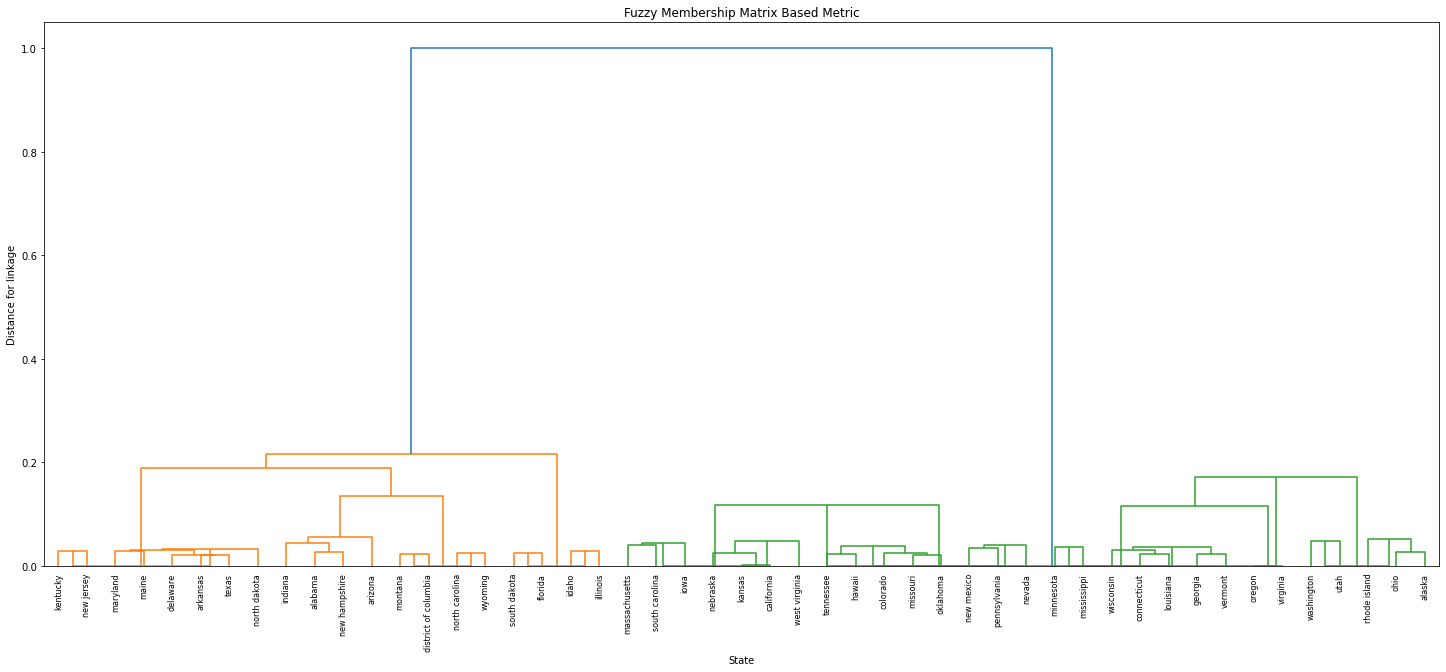

In [263]:
fig = plt.figure(figsize=(25, 10))
row_dendr = dendrogram(fuzzy_membership_matrix_fuzzy_linkage, labels=indices)
plt.title("Fuzzy Membership Matrix Based Metric")
plt.ylabel("Distance for linkage")
plt.xlabel("State")
plt.show()

## Naive Weighted Fuzzy Membership Matrix
The following calculates a hierarchical agglomerative clustering of the above data using our naive weighted fuzzy membership matrix metric.

In [254]:
def initialize_membership_matrix(n, k):
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for _ in range(k)]
        summation = sum(random_num_list)
        temp_list = [x / summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

# Update membership values based on the cluster centers
def update_membership_values_weighted(membership_mat, cluster_centers, df, m, k, w):
    p = float(2 / (m - 1))
    for i in range(len(df)):
        x = list(df.iloc[i])
        x = [x[i] * w[i] for i in range(0, len(w))]
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(distances[j] / distances[c], p) for c in range(k) if distances[c] != 0])
            membership_mat[i][j] = float(1 / den) if den != 0 else 0
    return membership_mat

In [255]:
def hierarchical_clustering_linkage_naive_weighted_fuzzy_membership_matrix(normalized_df, df):
    df_cpy = normalized_df.copy(deep=True)
    fuzzy_linkage = []
    curr_clusters = []
    for i in range(0, len(df_cpy)):
        curr_clusters.append([d for d in df_cpy.iloc[i]])

    curr_clusters
    idxs = [i for i in df_cpy.index]
    items_per_cluster = [1 for i in range(0, len(curr_clusters))]
    m = 2.00
    n = len(df_cpy)
    k = len(curr_clusters)
    v = [np.std(df.iloc[:,i]) / np.average(df.iloc[:,i]) for i in range(0, len(df.columns))]
    w = [v[i] / sum(v) for i in range(0, len(v))]
    mat = initialize_membership_matrix(n, k)

    while len(curr_clusters) > 1:
        n = len(df_cpy)
        k = len(curr_clusters)

        mat = initialize_membership_matrix(n, k)
        mat = update_membership_values_weighted(mat, curr_clusters, df_cpy, m, k, w)
        for m in range(0, len(mat)):
            mat[m][m] = 100
        new_clusters = np.argwhere(mat == np.amin(mat))[0]
        c1 = new_clusters[0]
        c2 = new_clusters[1]
        curr_dist = np.amin(mat)
        print(f"k {k} c1 {c1} c2 {c2} curr dist {curr_dist}")

        # Specify new cluster centroids
        ncl = list(map(operator.add, curr_clusters[c1], curr_clusters[c2]))
        new_c = [x / 2 for x in ncl]

        # Remove old clusters from the set of current clusters
        curr_clusters.pop(c1)
        curr_clusters.pop(c2-1)

        # Drop old elements in dataframe
        df_cpy = df_cpy.drop([c1, c2])
        df_cpy = df_cpy.reset_index(drop=True)

        # Add in new cluster to dataframe
        df_cpy.loc[len(df_cpy)] = new_c

        # Increment for new cluster
        idxs.append(idxs[-1] + 1)

        # Add new cluster to list of clusters
        curr_clusters.append(new_c)

        # Update number of items per cluster, removing old ones and adding in new one
        num_items = items_per_cluster[c1] + items_per_cluster[c2]
        items_per_cluster.pop(c1)
        items_per_cluster.pop(c2-1)
        items_per_cluster.append(num_items)

        # Add new iteraion to linkage
        fuzzy_linkage.append([idxs[c1], idxs[c2], curr_dist, num_items])

        # Remove old cluster indices
        if c2 > c1:
            idxs.pop(c1)
            idxs.pop(c2-1)
        else:
            idxs.pop(c2)
            idxs.pop(c1-1)
            
    return fuzzy_linkage

In [256]:
naive_weighted_fuzzy_linkage = hierarchical_clustering_linkage_naive_weighted_fuzzy_membership_matrix(normalized_df, data_clean)
tpd = pd.DataFrame(naive_weighted_fuzzy_linkage, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(len(naive_weighted_fuzzy_linkage))])
tpd

k 49 c1 28 c2 4 curr dist 0.001497904520998861
k 48 c1 41 c2 3 curr dist 0.019838465338754482
k 47 c1 36 c2 2 curr dist 0.02024416212104769
k 46 c1 16 c2 1 curr dist 0.020656088848667428
k 45 c1 31 c2 0 curr dist 0.02109060692641982
k 44 c1 19 c2 0 curr dist 0.021545981348099933
k 43 c1 23 c2 0 curr dist 0.022044038200377643
k 42 c1 17 c2 0 curr dist 0.02253876359974636
k 41 c1 4 c2 0 curr dist 0.02306950397164492
k 40 c1 30 c2 0 curr dist 0.02360304033155635
k 39 c1 27 c2 0 curr dist 0.0241692797402045
k 38 c1 23 c2 0 curr dist 0.024777842770837635
k 37 c1 2 c2 0 curr dist 0.02541831535430999
k 36 c1 1 c2 0 curr dist 0.026080472475896274
k 35 c1 5 c2 0 curr dist 0.02677940676677606
k 34 c1 11 c2 0 curr dist 0.027511793287291832
k 33 c1 2 c2 0 curr dist 0.02831393404554256
k 32 c1 2 c2 0 curr dist 0.029133255343143143
k 31 c1 12 c2 0 curr dist 0.029985638096813663
k 30 c1 6 c2 0 curr dist 0.030899490122809025
k 29 c1 5 c2 0 curr dist 0.03193996018921718
k 28 c1 5 c2 0 curr dist 0.03299

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,28,4,0.001498,2
cluster 2,43,3,0.019838,2
cluster 3,39,2,0.020244,2
cluster 4,19,1,0.020656,2
cluster 5,37,0,0.021091,2
cluster 6,25,5,0.021546,2
cluster 7,32,6,0.022044,2
cluster 8,26,7,0.022539,2
cluster 9,12,8,0.023070,2
cluster 10,48,9,0.023603,2


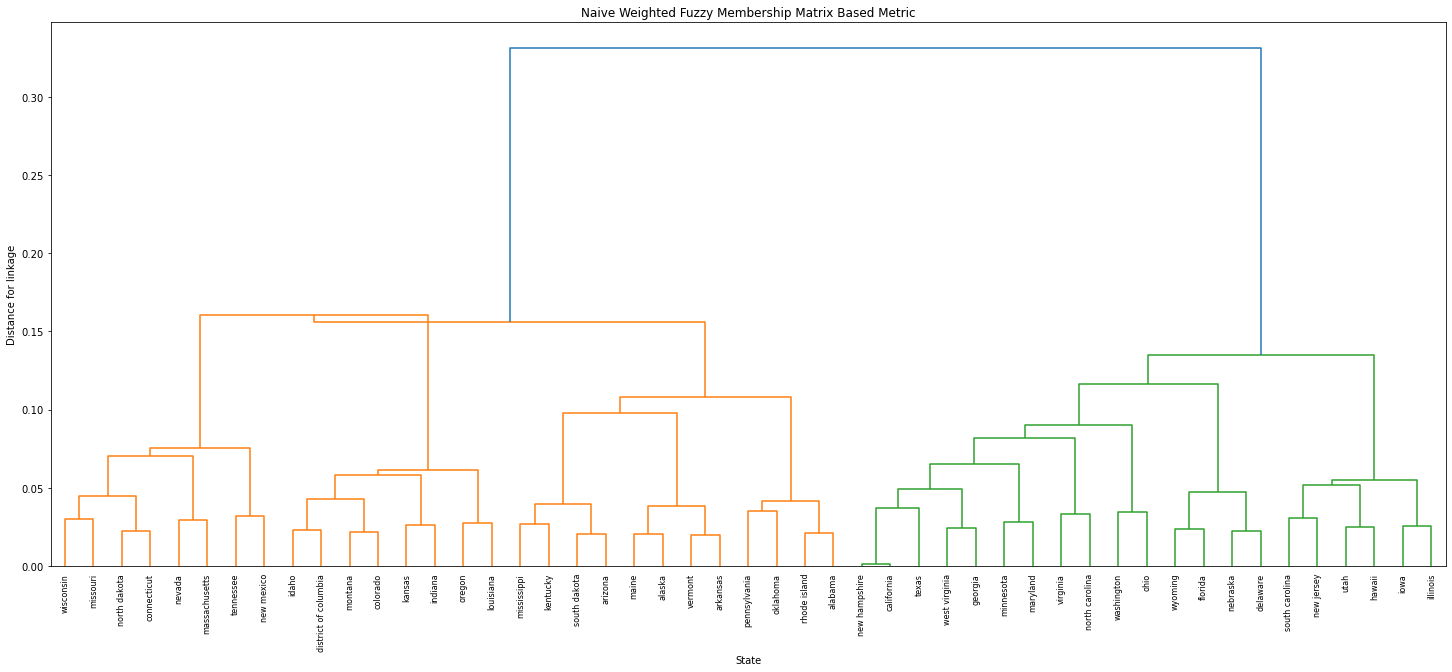

In [265]:
fig = plt.figure(figsize=(25, 10))
row_dendr = dendrogram(naive_weighted_fuzzy_linkage, labels=indices)
plt.title("Naive Weighted Fuzzy Membership Matrix Based Metric")
plt.ylabel("Distance for linkage")
plt.xlabel("State")
plt.show()

## Entropy Weight Measure Weighted Fuzzy Membership Matrix
The following calculates a hierarchical agglomerative clustering of the above data using our entropy weight measure weighted fuzzy membership matrix metric.

In [259]:
def ewm(df):
    df = df.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
    rows, cols = df.shape 
    k = 1.0 / math.log(rows)
    
    p = df / df.sum(axis=0)
    lnf = -np.log(p , where = df!=0 )*p*k
    
    d = 1 - lnf.sum(axis=0)
    w = d / d.sum()
    
    w = pd.DataFrame(w)
    w = w.round(5)
    w.index = df.columns
    w.columns =['weight']
    return w

In [260]:
def hierarchical_clustering_linkage_ewm_weighted_fuzzy_membership_matrix(clusters, df):
    df_cpy = normalized_df.copy(deep=True)
    fuzzy_linkage = []
    curr_clusters = []
    for i in range(0, len(df_cpy)):
        curr_clusters.append([d for d in df_cpy.iloc[i]])

    curr_clusters
    idxs = [i for i in df_cpy.index]
    items_per_cluster = [1 for i in range(0, len(curr_clusters))]
    m = 2.00
    n = len(df_cpy)
    k = len(curr_clusters)
    v = [np.std(df.iloc[:,i]) / np.average(df.iloc[:,i]) for i in range(0, len(df.columns))]
    w = list(ewm(normalized_df)['weight'])
    mat = initialize_membership_matrix(n, k)

    while len(curr_clusters) > 1:
        n = len(df_cpy)
        k = len(curr_clusters)

        mat = initialize_membership_matrix(n, k)
        mat = update_membership_values_weighted(mat, curr_clusters, df_cpy, m, k, w)
        for m in range(0, len(mat)):
            mat[m][m] = 100
        new_clusters = np.argwhere(mat == np.amin(mat))[0]
        c1 = new_clusters[0]
        c2 = new_clusters[1]
        curr_dist = np.amin(mat)
        print(f"k {k} c1 {c1} c2 {c2} curr dist {curr_dist}")

        # Specify new cluster centroids
        ncl = list(map(operator.add, curr_clusters[c1], curr_clusters[c2]))
        new_c = [x / 2 for x in ncl]

        # Remove old clusters from the set of current clusters
        curr_clusters.pop(c1)
        curr_clusters.pop(c2-1)

        # Drop old elements in dataframe
        df_cpy = df_cpy.drop([c1, c2])
        df_cpy = df_cpy.reset_index(drop=True)

        # Add in new cluster to dataframe
        df_cpy.loc[len(df_cpy)] = new_c

        # Increment for new cluster
        idxs.append(idxs[-1] + 1)

        # Add new cluster to list of clusters
        curr_clusters.append(new_c)

        # Update number of items per cluster, removing old ones and adding in new one
        num_items = items_per_cluster[c1] + items_per_cluster[c2]
        items_per_cluster.pop(c1)
        items_per_cluster.pop(c2-1)
        items_per_cluster.append(num_items)

        # Add new iteraion to linkage
        fuzzy_linkage.append([idxs[c1], idxs[c2], curr_dist, num_items])

        # Remove old cluster indices
        if c2 > c1:
            idxs.pop(c1)
            idxs.pop(c2-1)
        else:
            idxs.pop(c2)
            idxs.pop(c1-1)
            
    return fuzzy_linkage

In [261]:
ewm_fuzzy_linkage = hierarchical_clustering_linkage_ewm_weighted_fuzzy_membership_matrix(normalized_df, data_clean)
tpd = pd.DataFrame(ewm_fuzzy_linkage, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(len(ewm_fuzzy_linkage))])
tpd

k 49 c1 28 c2 4 curr dist 0.0014984939196006307
k 48 c1 41 c2 3 curr dist 0.019838592205941388
k 47 c1 36 c2 2 curr dist 0.020244214528891944
k 46 c1 22 c2 1 curr dist 0.020656200893113486
k 45 c1 21 c2 0 curr dist 0.021092575494494784
k 44 c1 2 c2 0 curr dist 0.02154954103342783
k 43 c1 27 c2 0 curr dist 0.022029338736878856
k 42 c1 4 c2 0 curr dist 0.022530191898028493
k 41 c1 9 c2 0 curr dist 0.023047733101766405
k 40 c1 17 c2 0 curr dist 0.023578318040653596
k 39 c1 23 c2 0 curr dist 0.024179394943647965
k 38 c1 24 c2 0 curr dist 0.02475292491166968
k 37 c1 24 c2 0 curr dist 0.02536730487799949
k 36 c1 1 c2 0 curr dist 0.026038589903746943
k 35 c1 5 c2 0 curr dist 0.02673317158654345
k 34 c1 11 c2 0 curr dist 0.02746166592832145
k 33 c1 2 c2 0 curr dist 0.028258670462614308
k 32 c1 14 c2 0 curr dist 0.029051457202361526
k 31 c1 3 c2 0 curr dist 0.029912306708835743
k 30 c1 6 c2 0 curr dist 0.030790518955888493
k 29 c1 5 c2 0 curr dist 0.031795980407397846
k 28 c1 5 c2 0 curr dist 0

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,28,4,0.001498,2
cluster 2,43,3,0.019839,2
cluster 3,39,2,0.020244,2
cluster 4,25,1,0.020656,2
cluster 5,26,0,0.021093,2
cluster 6,7,5,0.021550,2
cluster 7,37,6,0.022029,2
cluster 8,12,8,0.022530,2
cluster 9,19,9,0.023048,2
cluster 10,32,10,0.023578,2


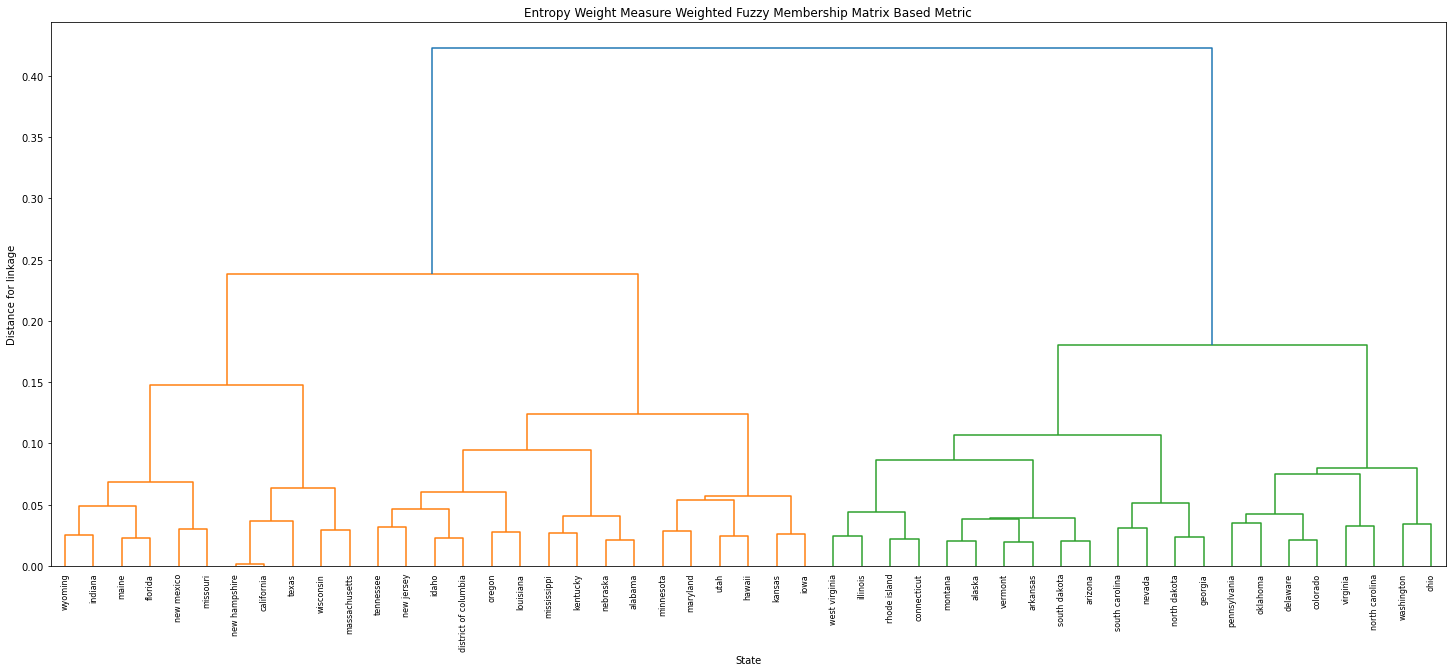

In [266]:
fig = plt.figure(figsize=(25, 10))
row_dendr = dendrogram(ewm_fuzzy_linkage, labels=indices)
plt.title("Entropy Weight Measure Weighted Fuzzy Membership Matrix Based Metric")
plt.ylabel("Distance for linkage")
plt.xlabel("State")
plt.show()